In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import os
from tqdm import tqdm_notebook as tqdm

from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.utils import plot_some
from csbdeep.data import RawData, create_patches
from csbdeep.io import load_training_data
from keras.models import load_model
from layers import MaxPoolingWithArgmax2D, MaxUnpooling2D

Using TensorFlow backend.
/home/npmartins/miniconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/npmartins/miniconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/npmartins/miniconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [2]:
limit_gpu_memory(fraction=2/3)

In [3]:
model = load_model('mysegnet.h5', custom_objects={'MaxPoolingWithArgmax2D': MaxPoolingWithArgmax2D, 'MaxUnpooling2D':MaxUnpooling2D})
#model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
base_dir = '/path/to/image/dir'
testImgDir = os.path.join(base_dir, 'testImages')
testLabDir = os.path.join(base_dir, 'testLabels')

In [5]:
imgList = os.listdir(testImgDir)
img_path = os.path.join(testImgDir, imgList[0])

labList = os.listdir(testLabDir)
lab_path = os.path.join(testLabDir, labList[0])

img = imread(img_path)
lab = imread(lab_path)

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
print('image tensor shape: ',img_tensor.shape)
print('image tensor max: ', np.max(img_tensor))

lab_tensor = image.img_to_array(lab)
lab_tensor = np.expand_dims(lab_tensor, axis=0)
lab_tensor /= 255
print('label tensor shape: ', lab_tensor.shape)
print('label tensor max: ', np.max(lab_tensor))

image tensor shape:  (1, 512, 512, 1)
image tensor max:  0.78431374
label tensor shape:  (1, 512, 512, 1)
label tensor max:  0.72156864


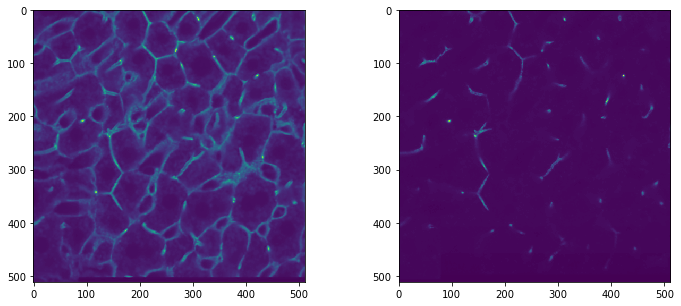

In [6]:
fig = plt.figure(figsize=(12,5))
imgplt = fig.add_subplot(1, 2, 1)
imgplt.imshow(img_tensor[0, ..., 0])
labplt = fig.add_subplot(1, 2, 2)
labplt.imshow(lab_tensor[0,...,0])

(1, 128, 128, 1)


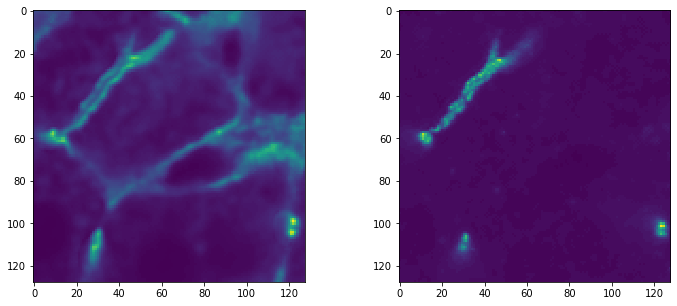

In [8]:
px_coord = 2

x = img_tensor[:, px_coord*128:(px_coord+1)*128, px_coord*128:(px_coord+1)*128]
y = lab_tensor[:, px_coord*128:(px_coord+1)*128, px_coord*128:(px_coord+1)*128]
print(x.shape)

fig = plt.figure(figsize=(12,5))
raw = fig.add_subplot(1, 2, 1)
raw.imshow(x[0, ..., 0])
gt = fig.add_subplot(1, 2, 2)
gt.imshow(y[0, ..., 0])

In [9]:
pred = model.predict(
    x,
)

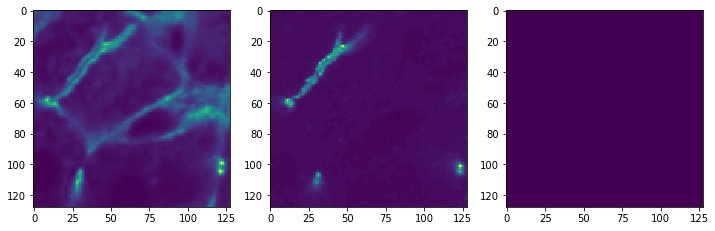

In [10]:
fig = plt.figure(figsize=(12,5))
raw = fig.add_subplot(1, 3, 1)
raw.imshow(x[0, ..., 0])
gt = fig.add_subplot(1, 3, 2)
gt.imshow(y[0, ..., 0])
res = fig.add_subplot(1, 3, 3)
res.imshow(pred[0, ..., 0])

In [11]:
print(np.min(x), np.max(x))
print(np.min(y), np.max(y))
print(np.min(pred), np.max(pred))

0.047058824 0.63529414
0.015686275 0.29411766
1.0 1.0
